# Table of contents
1.	[Purpose](#purpose)
2.	[Inputs](#inputs)
3.	[Outputs](#outputs)
4.	[Constraints](#constraints)
5.	[Dependencies](#dependencies)
    * [5.1 Code Language](#codelanguage)
      * [5.1.1 package requirements](#packagerequirements)
6.	[Code](#code)
7.	[Tests](#tests)
8.	[Provenance](#provenance)
9.	[Citations](#citations)
---

# Large River Monitoring Forum Biogeographic Analysis Package – Biodiversity Indices

## Purpose <a name="purpose"></a>
The Large River Monitoring Forum (LRMF) is a USGS led initiative to bring together researchers from across the nation involved in monitoring species and populations of fishes in large river systems.  The forum works collaboratively to understand best practices in monitoring and to study the trends in fish populations through space in time in response to environmental drivers.  
The initial work of the forum focused on comparisons of methods and documented in five large river systems (Ward et al. 2017).  The analyses presented here build on that work by taking the data compiled in that effort (Counihan et al. 2016) and allowing the user to explore trends in biodiversity by river reach through time.  Specifically, this package summarizes the data for five commonly used biodiversity indices: 
* **1.	Margalef Species Riches Index (Margalef 1958)** <a name="subinput1"></a>
* **2.	Shannon-Wiener Indices (Shannon 1948; )** <a name="subinput1"></a>
* **3.	Simpson (Simpson 1949)** <a name="subinput1"></a>
* **4.	Hill Numbers (Hill 1973)** <a name="subinput1"></a>
* **5.	Pielou’s Species Evenness (Pielou 1966)** <a name="subinput1"></a>

## Inputs <a name="inputs"></a>
The bases of the analyses are the fish assemblage data Large River Monitoring Forum Fish Assemblage Database 2016 (https://www.sciencebase.gov/catalog/item/575ee33fe4b04f417c2b05ca).  That dataset includes data for the Colorado, Columbia, Mississippi, Illinois and Tallapoosa Rivers.  For each river the fish assemblage data collected during the monitoring efforts was compiled and summarized as the mean number of individuals of that species in that reach for a given year.  
The analysis package was developed with the following environment(s):
* **1.  Python 2.7.13 with math module** <a name="subinput1"></a>
* **2.  Anaconda 4.3.1, with Jupyter Notebook** <a name="subinput1"></a>
* **3.  Pandas 0.19.2** <a name="subinput1"></a>
* **4.  Matplotlib 2.0.0** <a name="subinput1"></a>
* **5.  Numpy 1.11.3** <a name="subinput1"></a>

## Outputs <a name="outputs"></a>
The output of the analyses are variants of five biodiversity indices used by biologist to characterize species assemblages (Clarke and Gorley 2006).   For each of the indices tables are generated showing the values for each river reach and each year.  Those tables are then used to graph the trends in diversity through time for each reach.  

* **1.  Margalef Species Richness Index** <a name="subinput1"></a>
* **2.  Shannon-Wiener Indexes, Log(e), Log(2), Log(10)** <a name="subinput1"></a>
* **3.  Simpsons:** <a name="subinput1"></a>
    * **    a.  Lambda** <a name="subinput1"></a>
    * **    b.  1-Lambda** <a name="subinput1"></a>
    * **    c.  Lambda'** <a name="subinput1"></a>
    * **    d.  1-Lambda'** <a name="subinput1"></a>
* **4. Hill Numbers:** <a name="subinput1"></a>
    * **    a.  N1** <a name="subinput1"></a>
    * **    b.  N2** <a name="subinput1"></a>
    * **    c.  N-Inf** <a name="subinput1"></a>
    * **    d.  N10** <a name="subinput1"></a>
    * **    e.  N10'** <a name="subinput1"></a>
    * **    f.  N21** <a name="subinput1"></a>
    * **    g.  N21'** <a name="subinput1"></a>
* **5.  Pielou's Species Evenness Index** <a name="subinput1"></a>



## Constraints <a name="constraints"></a>
These data were compiled for a set of analyses related to the fish assemblages on portions of the five large rivers. The data represent a subset of the monitoring data that are collected for each of the rivers and in some cases a subset of the gear used in the monitoring protocols, so it is important that any re-analyses with this data be done with a clear understanding of the criteria used in compiling this data. Electrofishing sampling was done for the four of the rivers (Colorado, Illinois, Mississippi, and Tallapoosa) and gillnetting was done on the Columbia River.

## Dependencies <a name="dependencies"></a>
These analyses are currently reliant on a local copy of the LRMF Fish Assemblage dataset (Counihan et al 2016).
Code execution dependencies
•	Code Language 
This code is written in Python 3.x. with the math module.
	Python package requirements 
The required packages for proper code execution include:
	Anaconda 4.3.1, with Jupyter Notebook 
	Pandas 0.19.2
	Matplotlib 2.0.
	Numpy 1.11.3


## Tests <a name="tests"></a>
To test the code developed here we requested that Tim Counihan run the same indices using the input data file for the Columbia River in the Primer E software.  The results were the same for each of the diversity indices included here.


## Provenance <a name="provenance"></a>
This code was written to be consistent with the format of the 2016 Fish Assemblage database developed by the Large River Monitoring Forum (Counihan et al. 2016; https://www.sciencebase.gov/catalog/item/575ee33fe4b04f417c2b05ca).  If additional surveys are included either adding years, river reaches or whole rivers, the format will need to be consistent with the format of the original dataset. 

## Citations <a name="citations"></a> 
Clarke, K. R., and R. N. Gorley. 2006. Primer v6: User Manual/Tutorial.  Primer-E Ltd. United Kindom. 190 p.
Counihan, T.D., Waite, I.R., Casper, Andy, Ward, David, Sauer, Jennifer, Irwin, Elise, Chapman, Colin, Paukert, Craig, Ickes, Brian, Kosovich, John, and Bayer, J.M., 2016, Large River Monitoring Forum Fish Assemblage Database 2016: U.S. Geological Survey, https://doi.org/10.5066/F7CN723D.
Hill, M 1973. Diversity and evenness: a unifying notation and its consequences. Ecology 54: 427– 432.
Margalef, R. 1958 Information theory in ecology. General Systems, 3 (1958), pp. 36-71
Pielou, E. C., 1966. The measurement of diversity in different types of biological collections. Journal of Theoretical Biology, 13, 131–44.
Shannon, C.E. 1948. A mathematical theory of communication. Bell System Technical Journal, 27, 379–423.
Simpson, E. 1949. Measurement of diversity. - Nature, Lond. 163: 688.
Spellerberg, I. F., and P. J. Fedor.  2003. A tribute to Claude Shannon (1916–2001) and a plea for more rigorous use of species richness, species diversity and the ‘Shannon–Wiener’ Index.  Global Ecology and Biodiversity. https://doi.org/10.1046/j.1466-822X.2003.00015.x
Ward, D., A. Casper, T. Counihan, J. Bayer, I. Waite, J. Kosovich, C. Chapman, E. Irwin, J. Saur, B. Ickes, A. McKerrow.  2017.  Long-term fish monitoring in large rivers: Utility of “benchmarking” across basins. Fisheries.





This code was written to calculate a number of indices describing biodiversity calculated from results of fish surveys on the five major rivers studied by the Large River Monitoring Forum (LRMF).  Results of these calculations are then plotted by river segment and year, with png format images saved along with a csv file containing the input data with columns of biodiversity indices appended.

Since this was written specifically to receive LRMF data as inputs, it was tailored accordingly.  Inputs for the script are text files exported from LRMF river feature datasets (https://www.sciencebase.gov/catalog/item/575ee33fe4b04f417c2b05ca), and have the following column ordering: ObjectID, River, RiverSeg, Year, sp1, sp2...spN.  The following assumptions are therefore made, regarding input formatting:

    1.  Existence of the field "River", with river name.
    2.  Existence of the field "RiverSeg" with river segment names.
    3.  Existence of the field "Year" with year for which observations were made.
    4.  While order of 1-3 is inconsequential, species survey data begins at the fifth column and continues to end of table.
    
This was developed with the following environment(s):

    1.  Python 2.7.13 with math module
    2.  Anaconda 4.3.1, with Jupyter Notebook
    3.  Pandas 0.19.2
    4.  Matplotlib 2.0.0
    5.  Numpy 1.11.3
    
The following Biodiversity Indices are calculated and plotted:

    1.  Margalef Species Richness Index
    2.  Shannon-Wiener Indexes, Log(e), Log(2), Log(10)
    3.  Simpsons:
        a.  Lambda
        b.  1-Lambda
        c.  Lambda'
        d.  1-Lambda'
    4. Hill Numbers:
        a.  N1
        b.  N2
        c.  N-Inf
        d.  N10
        e.  N10'
        f.  N21
        g.  N21'
    5.  Pielou's Species Evenness Index

In [194]:
##  Import required python modules
import numpy as np
import matplotlib
import pandas as pd
from matplotlib import pyplot as plt
import math

In [451]:
##  Define existing output location
##  i.e. Y:\LRMF\graphics\Columbia
output = raw_input("Please provide a full-path output directory:")

Please provide a full-path output directory:Y:\LRMF\graphics\Columbia


In [452]:
##  Ask for input file, full path
##  i.e. Y:\LRMF\R_tables\columbia_river_orig.csv
inputFile = raw_input("Please provide a full-path input file:")

data = pd.read_csv(inputFile,header=0)

Please provide a full-path input file:Y:\LRMF\R_tables\columbia_river_orig.csv


In [453]:
##  define variable as count of columns in table.  Provides "stopping" point for calculations after indices have been added
last = len(data.columns)

In [454]:
## show dataframe of table
data

,OBJECTID,River,RiverSeg,Year,BLGL,BLSK,CARP,CHIN,CHUM,CMCB,...,PNSD,SMBS,STEE,STFL,TSSB,WLYE,WTCP,WTSG,YLBH,YWPH
0,1,Columbia,Bonneville Reservoir,2006,0,0,0,0,0,0,...,0,0,0,0,0,0,0,13.512821,0,0.051282
1,2,Columbia,Bonneville Reservoir,2007,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7.641026,0,0.025641
2,3,Columbia,Bonneville Reservoir,2008,0,0,0,0,0,0,...,0,0,0,0,0,0,0,12.131579,0,0.421053
3,4,Columbia,Bonneville Reservoir,2009,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8.333333,0,0.076923
4,5,Columbia,Bonneville Reservoir,2010,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7.228571,0,0.457143
5,6,Columbia,Bonneville Reservoir,2011,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5.657895,0,0.157895
6,7,Columbia,Bonneville Reservoir,2012,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2.973684,0,0.026316
7,8,Columbia,Bonneville Reservoir,2013,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4.257143,0,0.114286
8,9,Columbia,Columbia River Estuary,2004,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4.243590,0,0.256410
9,10,Columbia,Columbia River Estuary,2005,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3.685393,0,0.022472


In [455]:
## add new column
data["Margalef"] = ""

In [456]:
##  for each row calculate Margalef Species Richness Index
for i in range(len(data)):
    data.loc[i,'Margalef'] = (len(data.iloc[i][4:last][data.iloc[i][4:last]>0])-1)/math.log(sum(data.iloc[i][4:last][data.iloc[i][4:last]>0]))


In [457]:
## display data frame with new index
data

,OBJECTID,River,RiverSeg,Year,BLGL,BLSK,CARP,CHIN,CHUM,CMCB,...,SMBS,STEE,STFL,TSSB,WLYE,WTCP,WTSG,YLBH,YWPH,Margalef
0,1,Columbia,Bonneville Reservoir,2006,0,0,0,0,0,0,...,0,0,0,0,0,0,13.512821,0,0.051282,1.96138
1,2,Columbia,Bonneville Reservoir,2007,0,0,0,0,0,0,...,0,0,0,0,0,0,7.641026,0,0.025641,2.0087
2,3,Columbia,Bonneville Reservoir,2008,0,0,0,0,0,0,...,0,0,0,0,0,0,12.131579,0,0.421053,2.08865
3,4,Columbia,Bonneville Reservoir,2009,0,0,0,0,0,0,...,0,0,0,0,0,0,8.333333,0,0.076923,2.0491
4,5,Columbia,Bonneville Reservoir,2010,0,0,0,0,0,0,...,0,0,0,0,0,0,7.228571,0,0.457143,1.95691
5,6,Columbia,Bonneville Reservoir,2011,0,0,0,0,0,0,...,0,0,0,0,0,0,5.657895,0,0.157895,1.70478
6,7,Columbia,Bonneville Reservoir,2012,0,0,0,0,0,0,...,0,0,0,0,0,0,2.973684,0,0.026316,2.41991
7,8,Columbia,Bonneville Reservoir,2013,0,0,0,0,0,0,...,0,0,0,0,0,0,4.257143,0,0.114286,2.29569
8,9,Columbia,Columbia River Estuary,2004,0,0,0,0,0,0,...,0,0,0,0,0,0,4.243590,0,0.256410,1.54619
9,10,Columbia,Columbia River Estuary,2005,0,0,0,0,0,0,...,0,0,0,0,0,0,3.685393,0,0.022472,2.02485


In [462]:
## get unique river segment names
segments = data.RiverSeg.unique()

In [463]:
##  get river name
river = data.iloc[0]["River"]

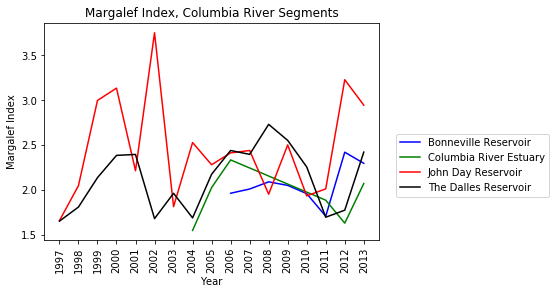

In [464]:
##  define color list
colors = ['b', 'g', 'r', 'k', 'c', 'm', 'y']
##  define index for iterating through color list
index = 0

##  for each river segment
for segment in segments:
    ##  subset df to non-zero values for the current river segment
    segDF = data.loc[data['RiverSeg'] == segment]
    segDF = segDF[segDF["Margalef"]>0]

    ## sort based on year
    segDF = segDF.sort_values('Year')
    ## define x,y for plotting
    x = segDF["Year"]
    y = segDF["Margalef"]
    ## change name of y to Riv Seg for legend
    y.name = segment
    ##  build graph...
    ##  plot segment x vs y assigning color based on index
    plt.plot(x,y,colors[index])
    ##  locate legend
    plt.legend(loc=(1.05,0.2))
    ##  update title
    plt.title("Margalef Index, " + river + " River Segments")
    ##  label x axis
    plt.xlabel('Year')
    ##  label y axis
    plt.ylabel('Margalef Index')
    ##  force x axis to integer values, increment by 1 year
    plt.xticks(np.arange(min(x), max(x)+1, 1.0))
    ##  rotate year labels 90 degrees
    plt.xticks(rotation=90)
    ##  advance color index
    index += 1
##  save figure
plt.savefig(output + "\\" + river + "_margalef.png", bbox_inches='tight',dpi=300, size=(2000,2000))
##  display figure
plt.show()

In [465]:
## add new column
data["SWI_2"] = ""

In [466]:
##  for each row calculate Shannon-Wiener Log(2) Index
for i in range(len(data)):
    swi = 0.0
    for x in range(len(data.iloc[0]))[4:last]:
        if data.iloc[i][x] > 0:
            swi += -(data.iloc[i][x]/sum(data.iloc[i][4:last][data.iloc[i][4:last]>0])) * math.log((data.iloc[i][x]/sum(data.iloc[i][4:last][data.iloc[i][4:last]>0])),2)
    data.loc[i,'SWI_2'] = swi

In [467]:
## display data frame with new index
data

,OBJECTID,River,RiverSeg,Year,BLGL,BLSK,CARP,CHIN,CHUM,CMCB,...,STEE,STFL,TSSB,WLYE,WTCP,WTSG,YLBH,YWPH,Margalef,SWI_2
0,1,Columbia,Bonneville Reservoir,2006,0,0,0,0,0,0,...,0,0,0,0,0,13.512821,0,0.051282,1.96138,1.32744
1,2,Columbia,Bonneville Reservoir,2007,0,0,0,0,0,0,...,0,0,0,0,0,7.641026,0,0.025641,2.0087,1.31909
2,3,Columbia,Bonneville Reservoir,2008,0,0,0,0,0,0,...,0,0,0,0,0,12.131579,0,0.421053,2.08865,1.31607
3,4,Columbia,Bonneville Reservoir,2009,0,0,0,0,0,0,...,0,0,0,0,0,8.333333,0,0.076923,2.0491,1.64812
4,5,Columbia,Bonneville Reservoir,2010,0,0,0,0,0,0,...,0,0,0,0,0,7.228571,0,0.457143,1.95691,2.08248
5,6,Columbia,Bonneville Reservoir,2011,0,0,0,0,0,0,...,0,0,0,0,0,5.657895,0,0.157895,1.70478,1.52226
6,7,Columbia,Bonneville Reservoir,2012,0,0,0,0,0,0,...,0,0,0,0,0,2.973684,0,0.026316,2.41991,1.65793
7,8,Columbia,Bonneville Reservoir,2013,0,0,0,0,0,0,...,0,0,0,0,0,4.257143,0,0.114286,2.29569,1.60518
8,9,Columbia,Columbia River Estuary,2004,0,0,0,0,0,0,...,0,0,0,0,0,4.243590,0,0.256410,1.54619,0.931138
9,10,Columbia,Columbia River Estuary,2005,0,0,0,0,0,0,...,0,0,0,0,0,3.685393,0,0.022472,2.02485,1.25012


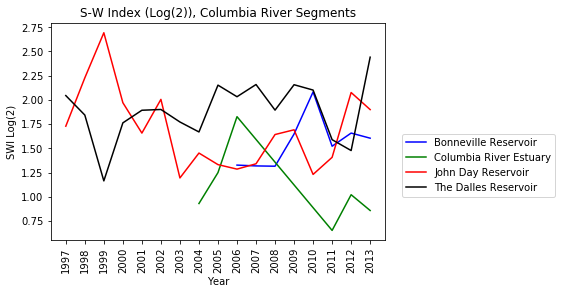

In [468]:
##  define color list
colors = ['b', 'g', 'r', 'k', 'c', 'm', 'y']
##  define index for iterating through color list
index = 0
##  for each river segment
for segment in segments:
    ##  subset df to non-zero values for the current river segment
    segDF = data.loc[data['RiverSeg'] == segment]
    segDF = segDF[segDF["SWI_2"]>0]

    ## sort based on year
    segDF = segDF.sort_values('Year')
    ## define x,y for plotting
    x = segDF["Year"]
    y = segDF["SWI_2"]
    ## change name of y to Riv Seg for legend
    y.name = segment
    ##  build graph...
    ##  plot segment x vs y assigning color based on index
    plt.plot(x,y,colors[index])
    ##  locate legend
    plt.legend(loc=(1.05,0.2))
    ##  update title
    plt.title("S-W Index (Log(2)), " + river + " River Segments")
    ##  label x axis
    plt.xlabel('Year')
    ##  label y axis
    plt.ylabel('SWI Log(2)')
    ##  force x axis to integer values, increment by 1 year
    plt.xticks(np.arange(min(x), max(x)+1, 1.0))
    ##  rotate year labels 90 degrees
    plt.xticks(rotation=90)
    ##  advance color index
    index += 1
##  save figure
plt.savefig(output + "\\" + river + "_SWI_2.png", bbox_inches='tight',dpi=300, size=(2000,2000))
##  display figure
plt.show()

In [469]:
## add new column
data["SWI_e"] = ""

In [470]:
##  for each row calculate Shannon-Wiener Log(e) Index
for i in range(len(data)):
    swi = 0.0
    for x in range(len(data.iloc[0]))[4:last]:
        if data.iloc[i][x] > 0:
            swi += -(data.iloc[i][x]/sum(data.iloc[i][4:last][data.iloc[i][4:last]>0])) * math.log((data.iloc[i][x]/sum(data.iloc[i][4:last][data.iloc[i][4:last]>0])))
    data.loc[i,'SWI_e'] = swi

In [471]:
## display data frame with new index
data

,OBJECTID,River,RiverSeg,Year,BLGL,BLSK,CARP,CHIN,CHUM,CMCB,...,STFL,TSSB,WLYE,WTCP,WTSG,YLBH,YWPH,Margalef,SWI_2,SWI_e
0,1,Columbia,Bonneville Reservoir,2006,0,0,0,0,0,0,...,0,0,0,0,13.512821,0,0.051282,1.96138,1.32744,0.920111
1,2,Columbia,Bonneville Reservoir,2007,0,0,0,0,0,0,...,0,0,0,0,7.641026,0,0.025641,2.0087,1.31909,0.914327
2,3,Columbia,Bonneville Reservoir,2008,0,0,0,0,0,0,...,0,0,0,0,12.131579,0,0.421053,2.08865,1.31607,0.912233
3,4,Columbia,Bonneville Reservoir,2009,0,0,0,0,0,0,...,0,0,0,0,8.333333,0,0.076923,2.0491,1.64812,1.14239
4,5,Columbia,Bonneville Reservoir,2010,0,0,0,0,0,0,...,0,0,0,0,7.228571,0,0.457143,1.95691,2.08248,1.44347
5,6,Columbia,Bonneville Reservoir,2011,0,0,0,0,0,0,...,0,0,0,0,5.657895,0,0.157895,1.70478,1.52226,1.05515
6,7,Columbia,Bonneville Reservoir,2012,0,0,0,0,0,0,...,0,0,0,0,2.973684,0,0.026316,2.41991,1.65793,1.14919
7,8,Columbia,Bonneville Reservoir,2013,0,0,0,0,0,0,...,0,0,0,0,4.257143,0,0.114286,2.29569,1.60518,1.11263
8,9,Columbia,Columbia River Estuary,2004,0,0,0,0,0,0,...,0,0,0,0,4.243590,0,0.256410,1.54619,0.931138,0.645415
9,10,Columbia,Columbia River Estuary,2005,0,0,0,0,0,0,...,0,0,0,0,3.685393,0,0.022472,2.02485,1.25012,0.866518


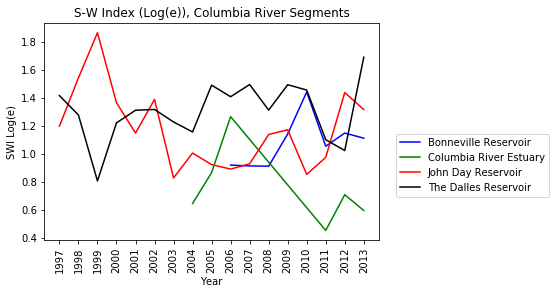

In [472]:
##  define color list
colors = ['b', 'g', 'r', 'k', 'c', 'm', 'y']
##  define index for iterating through color list
index = 0
##  for each river segment
for segment in segments:
    ##  subset df to non-zero values for the current river segment
    segDF = data.loc[data['RiverSeg'] == segment]
    segDF = segDF[segDF["SWI_e"]>0]

    ## sort based on year
    segDF = segDF.sort_values('Year')
    ## define x,y for plotting
    x = segDF["Year"]
    y = segDF["SWI_e"]
    ## change name of y to Riv Seg for legend
    y.name = segment
    ##  build graph...
    ##  plot segment x vs y assigning color based on index
    plt.plot(x,y,colors[index])
    ##  locate legend
    plt.legend(loc=(1.05,0.2))
    ##  update title
    plt.title("S-W Index (Log(e)), " + river + " River Segments")
    ##  label x axis
    plt.xlabel('Year')
    ##  label y axis
    plt.ylabel('SWI Log(e)')
    ##  force x axis to integer values, increment by 1 year
    plt.xticks(np.arange(min(x), max(x)+1, 1.0))
    ##  rotate year labels 90 degrees
    plt.xticks(rotation=90)
    ##  advance color index
    index += 1
##  save figure
plt.savefig(output + "\\" + river + "_SWI_e.png", bbox_inches='tight',dpi=300, size=(2000,2000))
##  display figure
plt.show()

In [473]:
## add new column
data["SWI_10"] = ""

In [474]:
##  for each row calculate Shannon-Wiener Log(10) Index
for i in range(len(data)):
    swi = 0.0
    for x in range(len(data.iloc[0]))[4:last]:
        if data.iloc[i][x] > 0:
            swi += -(data.iloc[i][x]/sum(data.iloc[i][4:last][data.iloc[i][4:last]>0])) * math.log((data.iloc[i][x]/sum(data.iloc[i][4:last][data.iloc[i][4:last]>0])),10)
    data.loc[i,'SWI_10'] = swi

In [475]:
## display data frame with new index
data

,OBJECTID,River,RiverSeg,Year,BLGL,BLSK,CARP,CHIN,CHUM,CMCB,...,TSSB,WLYE,WTCP,WTSG,YLBH,YWPH,Margalef,SWI_2,SWI_e,SWI_10
0,1,Columbia,Bonneville Reservoir,2006,0,0,0,0,0,0,...,0,0,0,13.512821,0,0.051282,1.96138,1.32744,0.920111,0.399599
1,2,Columbia,Bonneville Reservoir,2007,0,0,0,0,0,0,...,0,0,0,7.641026,0,0.025641,2.0087,1.31909,0.914327,0.397087
2,3,Columbia,Bonneville Reservoir,2008,0,0,0,0,0,0,...,0,0,0,12.131579,0,0.421053,2.08865,1.31607,0.912233,0.396178
3,4,Columbia,Bonneville Reservoir,2009,0,0,0,0,0,0,...,0,0,0,8.333333,0,0.076923,2.0491,1.64812,1.14239,0.496134
4,5,Columbia,Bonneville Reservoir,2010,0,0,0,0,0,0,...,0,0,0,7.228571,0,0.457143,1.95691,2.08248,1.44347,0.62689
5,6,Columbia,Bonneville Reservoir,2011,0,0,0,0,0,0,...,0,0,0,5.657895,0,0.157895,1.70478,1.52226,1.05515,0.458246
6,7,Columbia,Bonneville Reservoir,2012,0,0,0,0,0,0,...,0,0,0,2.973684,0,0.026316,2.41991,1.65793,1.14919,0.499087
7,8,Columbia,Bonneville Reservoir,2013,0,0,0,0,0,0,...,0,0,0,4.257143,0,0.114286,2.29569,1.60518,1.11263,0.483207
8,9,Columbia,Columbia River Estuary,2004,0,0,0,0,0,0,...,0,0,0,4.243590,0,0.256410,1.54619,0.931138,0.645415,0.2803
9,10,Columbia,Columbia River Estuary,2005,0,0,0,0,0,0,...,0,0,0,3.685393,0,0.022472,2.02485,1.25012,0.866518,0.376324


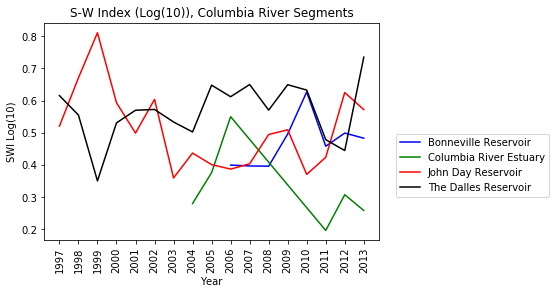

In [476]:
##  define color list
colors = ['b', 'g', 'r', 'k', 'c', 'm', 'y']
##  define index for iterating through color list
index = 0
##  for each river segment
for segment in segments:
    ##  subset df to non-zero values for the current river segment
    segDF = data.loc[data['RiverSeg'] == segment]
    segDF = segDF[segDF["SWI_10"]>0]

    ## sort based on year
    segDF = segDF.sort_values('Year')
    ## define x,y for plotting
    x = segDF["Year"]
    y = segDF["SWI_10"]
    ## change name of y to Riv Seg for legend
    y.name = segment
    ##  build graph...
    ##  plot segment x vs y assigning color based on index
    plt.plot(x,y,colors[index])
    ##  locate legend
    plt.legend(loc=(1.05,0.2))
    ##  update title
    plt.title("S-W Index (Log(10)), " + river + " River Segments")
    ##  label x axis
    plt.xlabel('Year')
    ##  label y axis
    plt.ylabel('SWI Log(10)')
    ##  force x axis to integer values, increment by 1 year
    plt.xticks(np.arange(min(x), max(x)+1, 1.0))
    ##  rotate year labels 90 degrees
    plt.xticks(rotation=90)
    ##  advance color index
    index += 1
##  save figure
plt.savefig(output + "\\" + river + "_SWI_10.png", bbox_inches='tight',dpi=300, size=(2000,2000))
##  display figure
plt.show()

In [477]:
## add new column
data["lam"] = ""

In [478]:
##  for each row calculate Lambda
for i in range(len(data)):
    N = 0.0
    for x in range(len(data.iloc[0]))[4:last]:
        if data.iloc[i][x] > 0:
            N += data.iloc[i][x]

    lam = 0.0
    for x in range(len(data.iloc[0]))[4:last]:
        lam += (data.iloc[i][x]/N) * (data.iloc[i][x]/N)
    data.loc[i,'lam'] = lam


In [479]:
## display data frame with new index
data

,OBJECTID,River,RiverSeg,Year,BLGL,BLSK,CARP,CHIN,CHUM,CMCB,...,WLYE,WTCP,WTSG,YLBH,YWPH,Margalef,SWI_2,SWI_e,SWI_10,lam
0,1,Columbia,Bonneville Reservoir,2006,0,0,0,0,0,0,...,0,0,13.512821,0,0.051282,1.96138,1.32744,0.920111,0.399599,0.485459
1,2,Columbia,Bonneville Reservoir,2007,0,0,0,0,0,0,...,0,0,7.641026,0,0.025641,2.0087,1.31909,0.914327,0.397087,0.477447
2,3,Columbia,Bonneville Reservoir,2008,0,0,0,0,0,0,...,0,0,12.131579,0,0.421053,2.08865,1.31607,0.912233,0.396178,0.524633
3,4,Columbia,Bonneville Reservoir,2009,0,0,0,0,0,0,...,0,0,8.333333,0,0.076923,2.0491,1.64812,1.14239,0.496134,0.364912
4,5,Columbia,Bonneville Reservoir,2010,0,0,0,0,0,0,...,0,0,7.228571,0,0.457143,1.95691,2.08248,1.44347,0.62689,0.280278
5,6,Columbia,Bonneville Reservoir,2011,0,0,0,0,0,0,...,0,0,5.657895,0,0.157895,1.70478,1.52226,1.05515,0.458246,0.40341
6,7,Columbia,Bonneville Reservoir,2012,0,0,0,0,0,0,...,0,0,2.973684,0,0.026316,2.41991,1.65793,1.14919,0.499087,0.330356
7,8,Columbia,Bonneville Reservoir,2013,0,0,0,0,0,0,...,0,0,4.257143,0,0.114286,2.29569,1.60518,1.11263,0.483207,0.373551
8,9,Columbia,Columbia River Estuary,2004,0,0,0,0,0,0,...,0,0,4.243590,0,0.256410,1.54619,0.931138,0.645415,0.2803,0.693622
9,10,Columbia,Columbia River Estuary,2005,0,0,0,0,0,0,...,0,0,3.685393,0,0.022472,2.02485,1.25012,0.866518,0.376324,0.540469


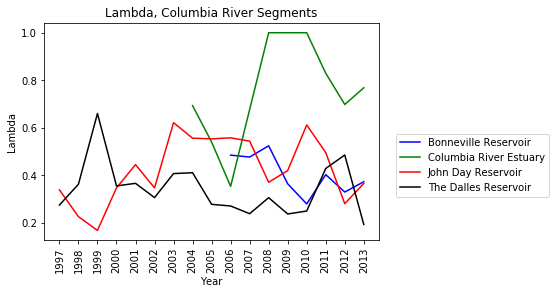

In [480]:
##  define color list
colors = ['b', 'g', 'r', 'k', 'c', 'm', 'y']
##  define index for iterating through color list
index = 0
##  for each river segment
for segment in segments:
    ##  subset df to non-zero values for the current river segment
    segDF = data.loc[data['RiverSeg'] == segment]
    segDF = segDF[segDF["lam"]>0]

    ## sort based on year
    segDF = segDF.sort_values('Year')
    ## define x,y for plotting
    x = segDF["Year"]
    y = segDF["lam"]
    ## change name of y to Riv Seg for legend
    y.name = segment
    ##  build graph...
    ##  plot segment x vs y
    plt.plot(x,y,colors[index])
    ##  locate legend
    plt.legend(loc=(1.05,0.2))
    ##  update title
    plt.title("Lambda, " + river + " River Segments")
    ##  label x axis
    plt.xlabel('Year')
    ##  label y axis
    plt.ylabel('Lambda')
    ##  force x axis to integer values, increment by 1 year
    plt.xticks(np.arange(min(x), max(x)+1, 1.0))
    ##  rotate year labels 90 degrees
    plt.xticks(rotation=90)
    ##  advance color index
    index += 1
##  save figure
plt.savefig(output + "\\" + river + "_Lambda.png", bbox_inches='tight',dpi=300, size=(2000,2000))
##  display figure
plt.show()

In [481]:
## add new column
data["1-lam"] = ""

In [482]:
##  for each row calculate 1-Lambda
for i in range(len(data)):
    N = 0.0
    for x in range(len(data.iloc[0]))[4:last]:
        if data.iloc[i][x] > 0:
            N += data.iloc[i][x]

    lam = 0.0
    for x in range(len(data.iloc[0]))[4:last]:
        lam += (data.iloc[i][x]/N) * (data.iloc[i][x]/N)
    data.loc[i,'1-lam'] = 1 - lam

In [483]:
## display data frame with new index
data

,OBJECTID,River,RiverSeg,Year,BLGL,BLSK,CARP,CHIN,CHUM,CMCB,...,WTCP,WTSG,YLBH,YWPH,Margalef,SWI_2,SWI_e,SWI_10,lam,1-lam
0,1,Columbia,Bonneville Reservoir,2006,0,0,0,0,0,0,...,0,13.512821,0,0.051282,1.96138,1.32744,0.920111,0.399599,0.485459,0.514541
1,2,Columbia,Bonneville Reservoir,2007,0,0,0,0,0,0,...,0,7.641026,0,0.025641,2.0087,1.31909,0.914327,0.397087,0.477447,0.522553
2,3,Columbia,Bonneville Reservoir,2008,0,0,0,0,0,0,...,0,12.131579,0,0.421053,2.08865,1.31607,0.912233,0.396178,0.524633,0.475367
3,4,Columbia,Bonneville Reservoir,2009,0,0,0,0,0,0,...,0,8.333333,0,0.076923,2.0491,1.64812,1.14239,0.496134,0.364912,0.635088
4,5,Columbia,Bonneville Reservoir,2010,0,0,0,0,0,0,...,0,7.228571,0,0.457143,1.95691,2.08248,1.44347,0.62689,0.280278,0.719722
5,6,Columbia,Bonneville Reservoir,2011,0,0,0,0,0,0,...,0,5.657895,0,0.157895,1.70478,1.52226,1.05515,0.458246,0.40341,0.59659
6,7,Columbia,Bonneville Reservoir,2012,0,0,0,0,0,0,...,0,2.973684,0,0.026316,2.41991,1.65793,1.14919,0.499087,0.330356,0.669644
7,8,Columbia,Bonneville Reservoir,2013,0,0,0,0,0,0,...,0,4.257143,0,0.114286,2.29569,1.60518,1.11263,0.483207,0.373551,0.626449
8,9,Columbia,Columbia River Estuary,2004,0,0,0,0,0,0,...,0,4.243590,0,0.256410,1.54619,0.931138,0.645415,0.2803,0.693622,0.306378
9,10,Columbia,Columbia River Estuary,2005,0,0,0,0,0,0,...,0,3.685393,0,0.022472,2.02485,1.25012,0.866518,0.376324,0.540469,0.459531


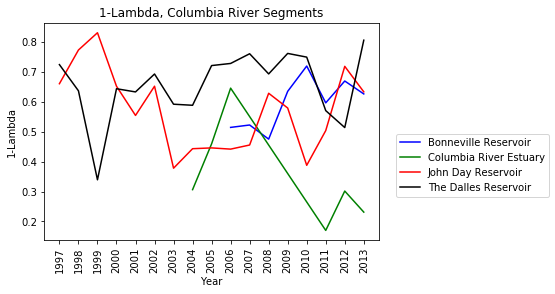

In [484]:
##  define color list
colors = ['b', 'g', 'r', 'k', 'c', 'm', 'y']
##  define index for iterating through color list
index = 0
##  for each river segment
for segment in segments:
    ##  subset df to non-zero values for the current river segment
    segDF = data.loc[data['RiverSeg'] == segment]
    segDF = segDF[segDF["1-lam"]>0]

    ## sort based on year
    segDF = segDF.sort_values('Year')
    ## define x,y for plotting
    x = segDF["Year"]
    y = segDF["1-lam"]
    ## change name of y to Riv Seg for legend
    y.name = segment
    ##  build graph...
    ##  plot segment x vs y
    plt.plot(x,y,colors[index])
    ##  locate legend
    plt.legend(loc=(1.05,0.2))
    ##  update title
    plt.title("1-Lambda, " + river + " River Segments")
    ##  label x axis
    plt.xlabel('Year')
    ##  label y axis
    plt.ylabel('1-Lambda')
    ##  force x axis to integer values, increment by 1 year
    plt.xticks(np.arange(min(x), max(x)+1, 1.0))
    ##  rotate year labels 90 degrees
    plt.xticks(rotation=90)
    ##  advance color index
    index += 1
##  save figure   
plt.savefig(output + "\\" + river + "_1-Lambda.png", bbox_inches='tight',dpi=300, size=(2000,2000))
##  show figure
plt.show()

In [485]:
## add new column
data["lam'"] = ""

In [486]:
##  for each row calculate Lambda Prime
for i in range(len(data)):
    N = 0.0
    for x in range(len(data.iloc[i]))[4:last]:
        if data.iloc[i][x] > 0:
            N += data.iloc[i][x]
    
    
    array = data.iloc[i][4:last]
    num = 0.0
    for y in array:
        num += (y * (y-1))
    lam = num/(N*(N-1))
    data.loc[i,"lam'"] = lam

In [487]:
## display data frame with new index
data

,OBJECTID,River,RiverSeg,Year,BLGL,BLSK,CARP,CHIN,CHUM,CMCB,...,WTSG,YLBH,YWPH,Margalef,SWI_2,SWI_e,SWI_10,lam,1-lam,lam'
0,1,Columbia,Bonneville Reservoir,2006,0,0,0,0,0,0,...,13.512821,0,0.051282,1.96138,1.32744,0.920111,0.399599,0.485459,0.514541,0.460122
1,2,Columbia,Bonneville Reservoir,2007,0,0,0,0,0,0,...,7.641026,0,0.025641,2.0087,1.31909,0.914327,0.397087,0.477447,0.522553,0.430162
2,3,Columbia,Bonneville Reservoir,2008,0,0,0,0,0,0,...,12.131579,0,0.421053,2.08865,1.31607,0.912233,0.396178,0.524633,0.475367,0.496141
3,4,Columbia,Bonneville Reservoir,2009,0,0,0,0,0,0,...,8.333333,0,0.076923,2.0491,1.64812,1.14239,0.496134,0.364912,0.635088,0.329015
4,5,Columbia,Bonneville Reservoir,2010,0,0,0,0,0,0,...,7.228571,0,0.457143,1.95691,2.08248,1.44347,0.62689,0.280278,0.719722,0.245096
5,6,Columbia,Bonneville Reservoir,2011,0,0,0,0,0,0,...,5.657895,0,0.157895,1.70478,1.52226,1.05515,0.458246,0.40341,0.59659,0.340261
6,7,Columbia,Bonneville Reservoir,2012,0,0,0,0,0,0,...,2.973684,0,0.026316,2.41991,1.65793,1.14919,0.499087,0.330356,0.669644,0.233232
7,8,Columbia,Bonneville Reservoir,2013,0,0,0,0,0,0,...,4.257143,0,0.114286,2.29569,1.60518,1.11263,0.483207,0.373551,0.626449,0.29353
8,9,Columbia,Columbia River Estuary,2004,0,0,0,0,0,0,...,4.243590,0,0.256410,1.54619,0.931138,0.645415,0.2803,0.693622,0.306378,0.687165
9,10,Columbia,Columbia River Estuary,2005,0,0,0,0,0,0,...,3.685393,0,0.022472,2.02485,1.25012,0.866518,0.376324,0.540469,0.459531,0.51544


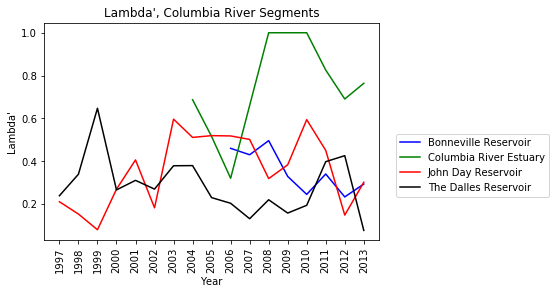

In [488]:
##  define color list
colors = ['b', 'g', 'r', 'k', 'c', 'm', 'y']
##  define index for iterating through color list
index = 0
##  for each river segment
for segment in segments:
    ##  subset df to non-zero values for the current river segment
    segDF = data.loc[data['RiverSeg'] == segment]
    segDF = segDF[segDF["lam'"]>0]

    ## sort based on year
    segDF = segDF.sort_values('Year')
    ## define x,y for plotting
    x = segDF["Year"]
    y = segDF["lam'"]
    ## change name of y to Riv Seg for legend
    y.name = segment
    ##  build graph...
    ##  plot segment x vs y
    plt.plot(x,y,colors[index])
    ##  locate legend
    plt.legend(loc=(1.05,0.2))
    ##  update title
    plt.title("Lambda', " + river + " River Segments")
    ##  label x axis
    plt.xlabel('Year')
    ##  label y axis
    plt.ylabel("Lambda'")
    ##  force x axis to integer values, increment by 1 year
    plt.xticks(np.arange(min(x), max(x)+1, 1.0))
    ##  rotate year labels 90 degrees
    plt.xticks(rotation=90)
    ##  advance color index
    index += 1
##  save figure
plt.savefig(output + "\\" + river + "_Lambda'.png", bbox_inches='tight',dpi=300, size=(2000,2000))
##  show figure
plt.show()

In [489]:
##  add new column
data["1-lam'"] = ""

In [490]:
##  for each row calculate 1-Lambda Prime
for i in range(len(data)):
    N = 0.0
    for x in range(len(data.iloc[i]))[4:last]:
        if data.iloc[i][x] > 0:
            N += data.iloc[i][x]
    
    
    array = data.iloc[i][4:last]
    num = 0.0
    for y in array:
        num += (y * (y-1))
    lam = num/(N*(N-1))
    data.loc[i,"1-lam'"] = 1 - lam

In [491]:
## display data frame with new index
data

,OBJECTID,River,RiverSeg,Year,BLGL,BLSK,CARP,CHIN,CHUM,CMCB,...,YLBH,YWPH,Margalef,SWI_2,SWI_e,SWI_10,lam,1-lam,lam',1-lam'
0,1,Columbia,Bonneville Reservoir,2006,0,0,0,0,0,0,...,0,0.051282,1.96138,1.32744,0.920111,0.399599,0.485459,0.514541,0.460122,0.539878
1,2,Columbia,Bonneville Reservoir,2007,0,0,0,0,0,0,...,0,0.025641,2.0087,1.31909,0.914327,0.397087,0.477447,0.522553,0.430162,0.569838
2,3,Columbia,Bonneville Reservoir,2008,0,0,0,0,0,0,...,0,0.421053,2.08865,1.31607,0.912233,0.396178,0.524633,0.475367,0.496141,0.503859
3,4,Columbia,Bonneville Reservoir,2009,0,0,0,0,0,0,...,0,0.076923,2.0491,1.64812,1.14239,0.496134,0.364912,0.635088,0.329015,0.670985
4,5,Columbia,Bonneville Reservoir,2010,0,0,0,0,0,0,...,0,0.457143,1.95691,2.08248,1.44347,0.62689,0.280278,0.719722,0.245096,0.754904
5,6,Columbia,Bonneville Reservoir,2011,0,0,0,0,0,0,...,0,0.157895,1.70478,1.52226,1.05515,0.458246,0.40341,0.59659,0.340261,0.659739
6,7,Columbia,Bonneville Reservoir,2012,0,0,0,0,0,0,...,0,0.026316,2.41991,1.65793,1.14919,0.499087,0.330356,0.669644,0.233232,0.766768
7,8,Columbia,Bonneville Reservoir,2013,0,0,0,0,0,0,...,0,0.114286,2.29569,1.60518,1.11263,0.483207,0.373551,0.626449,0.29353,0.70647
8,9,Columbia,Columbia River Estuary,2004,0,0,0,0,0,0,...,0,0.256410,1.54619,0.931138,0.645415,0.2803,0.693622,0.306378,0.687165,0.312835
9,10,Columbia,Columbia River Estuary,2005,0,0,0,0,0,0,...,0,0.022472,2.02485,1.25012,0.866518,0.376324,0.540469,0.459531,0.51544,0.48456


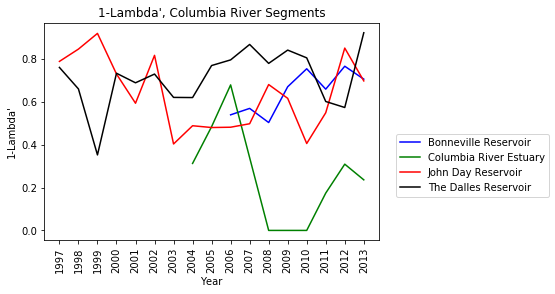

In [492]:
##  define color list
colors = ['b', 'g', 'r', 'k', 'c', 'm', 'y']
##  define index for iterating through color list
index = 0
##  for each river segment
for segment in segments:
    ##  subset df for the current river segment
    segDF = data.loc[data['RiverSeg'] == segment]
    segDF = segDF[segDF["lam'"]>0]
    ## sort based on year
    segDF = segDF.sort_values('Year')
    ## define x,y for plotting
    x = segDF["Year"]
    y = segDF["1-lam'"]
    ## change name of y to Riv Seg for legend
    y.name = segment
    ##  build graph...
    ##  plot segment x vs y
    plt.plot(x,y,colors[index])
    ##  locate legend
    plt.legend(loc=(1.05,0.2))
    ##  update title
    plt.title("1-Lambda', " + river + " River Segments")
    ##  label x axis
    plt.xlabel('Year')
    ##  label y axis
    plt.ylabel("1-Lambda'")
    ##  force x axis to integer values, increment by 1 year
    plt.xticks(np.arange(min(x), max(x)+1, 1.0))
    ##  rotate year labels 90 degrees
    plt.xticks(rotation=90)
    ##  advance color index
    index += 1
##  save figure
plt.savefig(output + "\\" + river + "_1-Lambda'.png", bbox_inches='tight',dpi=300, size=(2000,2000))
##  display figure
plt.show()

In [493]:
data["N1"] = ""

In [494]:
##  for each row calculate Hill N1
for i in range(len(data)):
    N1 = 0.0
    for x in range(len(data.iloc[0]))[4:last]:
        if data.iloc[i][x] > 0:
            N1 += -(data.iloc[i][x]/sum(data.iloc[i][4:last][data.iloc[i][4:last]>0])) * math.log((data.iloc[i][x]/sum(data.iloc[i][4:last][data.iloc[i][4:last]>0])))
    data.loc[i,'N1'] = math.exp(N1)

In [495]:
## display data frame with new index
data

,OBJECTID,River,RiverSeg,Year,BLGL,BLSK,CARP,CHIN,CHUM,CMCB,...,YWPH,Margalef,SWI_2,SWI_e,SWI_10,lam,1-lam,lam',1-lam',N1
0,1,Columbia,Bonneville Reservoir,2006,0,0,0,0,0,0,...,0.051282,1.96138,1.32744,0.920111,0.399599,0.485459,0.514541,0.460122,0.539878,2.50957
1,2,Columbia,Bonneville Reservoir,2007,0,0,0,0,0,0,...,0.025641,2.0087,1.31909,0.914327,0.397087,0.477447,0.522553,0.430162,0.569838,2.4951
2,3,Columbia,Bonneville Reservoir,2008,0,0,0,0,0,0,...,0.421053,2.08865,1.31607,0.912233,0.396178,0.524633,0.475367,0.496141,0.503859,2.48988
3,4,Columbia,Bonneville Reservoir,2009,0,0,0,0,0,0,...,0.076923,2.0491,1.64812,1.14239,0.496134,0.364912,0.635088,0.329015,0.670985,3.13425
4,5,Columbia,Bonneville Reservoir,2010,0,0,0,0,0,0,...,0.457143,1.95691,2.08248,1.44347,0.62689,0.280278,0.719722,0.245096,0.754904,4.23535
5,6,Columbia,Bonneville Reservoir,2011,0,0,0,0,0,0,...,0.157895,1.70478,1.52226,1.05515,0.458246,0.40341,0.59659,0.340261,0.659739,2.87241
6,7,Columbia,Bonneville Reservoir,2012,0,0,0,0,0,0,...,0.026316,2.41991,1.65793,1.14919,0.499087,0.330356,0.669644,0.233232,0.766768,3.15563
7,8,Columbia,Bonneville Reservoir,2013,0,0,0,0,0,0,...,0.114286,2.29569,1.60518,1.11263,0.483207,0.373551,0.626449,0.29353,0.70647,3.04234
8,9,Columbia,Columbia River Estuary,2004,0,0,0,0,0,0,...,0.256410,1.54619,0.931138,0.645415,0.2803,0.693622,0.306378,0.687165,0.312835,1.90678
9,10,Columbia,Columbia River Estuary,2005,0,0,0,0,0,0,...,0.022472,2.02485,1.25012,0.866518,0.376324,0.540469,0.459531,0.51544,0.48456,2.37861


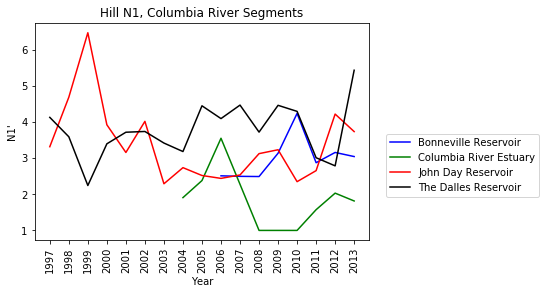

In [496]:
##  define color list
colors = ['b', 'g', 'r', 'k', 'c', 'm', 'y']
##  define index for iterating through color list
index = 0
##  for each river segment
for segment in segments:
    ##  subset df for the current river segment
    segDF = data.loc[data['RiverSeg'] == segment]
    segDF = segDF[segDF["lam'"]>0]

    ## sort based on year
    segDF = segDF.sort_values('Year')
    ## define x,y for plotting
    x = segDF["Year"]
    y = segDF["N1"]
    ## change name of y to Riv Seg for legend
    y.name = segment
    ##  build graph...
    ##  plot segment x vs y
    plt.plot(x,y,colors[index])
    ##  locate legend
    plt.legend(loc=(1.05,0.2))
    ##  update title
    plt.title("Hill N1, " + river + " River Segments")
    ##  label x axis
    plt.xlabel('Year')
    ##  label y axis
    plt.ylabel("N1'")
    ##  force x axis to integer values, increment by 1 year
    plt.xticks(np.arange(min(x), max(x)+1, 1.0))
    ##  rotate year labels 90 degrees
    plt.xticks(rotation=90)
    ##  advance color index
    index += 1
##  save figure
plt.savefig(output + "\\" + river + "_Hill_N1.png", bbox_inches='tight',dpi=300, size=(2000,2000))
##  display figure
plt.show()

In [497]:
## add new column
data["N2"] = ""

In [498]:
##  for each row calculate Hill N2
for i in range(len(data)):
    N = 0.0
    for x in range(len(data.iloc[0]))[4:last]:
        if data.iloc[i][x] > 0:
            N += data.iloc[i][x]

    lam = 0.0
    for x in range(len(data.iloc[0]))[4:last]:
        lam += (data.iloc[i][x]/N) * (data.iloc[i][x]/N)
    data.loc[i,'N2'] = 1/lam

In [499]:
## display data frame with new index
data

,OBJECTID,River,RiverSeg,Year,BLGL,BLSK,CARP,CHIN,CHUM,CMCB,...,Margalef,SWI_2,SWI_e,SWI_10,lam,1-lam,lam',1-lam',N1,N2
0,1,Columbia,Bonneville Reservoir,2006,0,0,0,0,0,0,...,1.96138,1.32744,0.920111,0.399599,0.485459,0.514541,0.460122,0.539878,2.50957,2.05991
1,2,Columbia,Bonneville Reservoir,2007,0,0,0,0,0,0,...,2.0087,1.31909,0.914327,0.397087,0.477447,0.522553,0.430162,0.569838,2.4951,2.09447
2,3,Columbia,Bonneville Reservoir,2008,0,0,0,0,0,0,...,2.08865,1.31607,0.912233,0.396178,0.524633,0.475367,0.496141,0.503859,2.48988,1.90609
3,4,Columbia,Bonneville Reservoir,2009,0,0,0,0,0,0,...,2.0491,1.64812,1.14239,0.496134,0.364912,0.635088,0.329015,0.670985,3.13425,2.74039
4,5,Columbia,Bonneville Reservoir,2010,0,0,0,0,0,0,...,1.95691,2.08248,1.44347,0.62689,0.280278,0.719722,0.245096,0.754904,4.23535,3.56789
5,6,Columbia,Bonneville Reservoir,2011,0,0,0,0,0,0,...,1.70478,1.52226,1.05515,0.458246,0.40341,0.59659,0.340261,0.659739,2.87241,2.47887
6,7,Columbia,Bonneville Reservoir,2012,0,0,0,0,0,0,...,2.41991,1.65793,1.14919,0.499087,0.330356,0.669644,0.233232,0.766768,3.15563,3.02704
7,8,Columbia,Bonneville Reservoir,2013,0,0,0,0,0,0,...,2.29569,1.60518,1.11263,0.483207,0.373551,0.626449,0.29353,0.70647,3.04234,2.67701
8,9,Columbia,Columbia River Estuary,2004,0,0,0,0,0,0,...,1.54619,0.931138,0.645415,0.2803,0.693622,0.306378,0.687165,0.312835,1.90678,1.44171
9,10,Columbia,Columbia River Estuary,2005,0,0,0,0,0,0,...,2.02485,1.25012,0.866518,0.376324,0.540469,0.459531,0.51544,0.48456,2.37861,1.85024


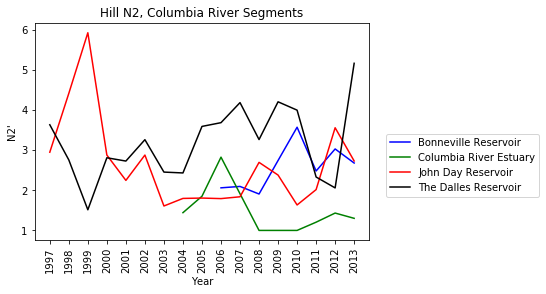

In [500]:
##  define color list
colors = ['b', 'g', 'r', 'k', 'c', 'm', 'y']
##  define index for iterating through color list
index = 0
##  for each river segment
for segment in segments:
    ##  subset df for the current river segment
    segDF = data.loc[data['RiverSeg'] == segment]
    segDF = segDF[segDF["lam'"]>0]

    ## sort based on year
    segDF = segDF.sort_values('Year')
    ## define x,y for plotting
    x = segDF["Year"]
    y = segDF["N2"]
    
    ## change name of y to Riv Seg for legend
    y.name = segment
    ##  build graph...
    plt.plot(x,y,colors[index])
    ##  locate legend
    plt.legend(loc=(1.05,0.2))
    ##  update title
    plt.title("Hill N2, " + river + " River Segments")
    ##  label x axis
    plt.xlabel('Year')
    ##  label y axis
    plt.ylabel("N2'")
    ##  force x axis to integer values, increment by 1 year
    plt.xticks(np.arange(min(x), max(x)+1, 1.0))
    ##  rotate year labels 90 degrees
    plt.xticks(rotation=90)
    ##  advance color index
    index += 1
##  save figure
plt.savefig(output + "\\" + river + "_Hill_N2.png", bbox_inches='tight',dpi=300, size=(2000,2000))
##  display figure
plt.show()

In [501]:
## add new column
data["N_Inf"] = ""

In [502]:
##  for each row calculate Hill N-infinity
for i in range(len(data)):
    
    N = 0.0
    for x in range(len(data.iloc[0]))[4:last]:
        if data.iloc[i][x] > 0:
            N += data.iloc[i][x]
    
    
    array = data.iloc[i][4:last]
    data.loc[i,'N_Inf'] = 1/(max(array)/N)

In [503]:
## display data frame with new index
data

,OBJECTID,River,RiverSeg,Year,BLGL,BLSK,CARP,CHIN,CHUM,CMCB,...,SWI_2,SWI_e,SWI_10,lam,1-lam,lam',1-lam',N1,N2,N_Inf
0,1,Columbia,Bonneville Reservoir,2006,0,0,0,0,0,0,...,1.32744,0.920111,0.399599,0.485459,0.514541,0.460122,0.539878,2.50957,2.05991,1.57685
1,2,Columbia,Bonneville Reservoir,2007,0,0,0,0,0,0,...,1.31909,0.914327,0.397087,0.477447,0.522553,0.430162,0.569838,2.4951,2.09447,1.57718
2,3,Columbia,Bonneville Reservoir,2008,0,0,0,0,0,0,...,1.31607,0.912233,0.396178,0.524633,0.475367,0.496141,0.503859,2.48988,1.90609,1.4577
3,4,Columbia,Bonneville Reservoir,2009,0,0,0,0,0,0,...,1.64812,1.14239,0.496134,0.364912,0.635088,0.329015,0.670985,3.13425,2.74039,2.24308
4,5,Columbia,Bonneville Reservoir,2010,0,0,0,0,0,0,...,2.08248,1.44347,0.62689,0.280278,0.719722,0.245096,0.754904,4.23535,3.56789,2.72101
5,6,Columbia,Bonneville Reservoir,2011,0,0,0,0,0,0,...,1.52226,1.05515,0.458246,0.40341,0.59659,0.340261,0.659739,2.87241,2.47887,1.84651
6,7,Columbia,Bonneville Reservoir,2012,0,0,0,0,0,0,...,1.65793,1.14919,0.499087,0.330356,0.669644,0.233232,0.766768,3.15563,3.02704,2.65487
7,8,Columbia,Bonneville Reservoir,2013,0,0,0,0,0,0,...,1.60518,1.11263,0.483207,0.373551,0.626449,0.29353,0.70647,3.04234,2.67701,2.07383
8,9,Columbia,Columbia River Estuary,2004,0,0,0,0,0,0,...,0.931138,0.645415,0.2803,0.693622,0.306378,0.687165,0.312835,1.90678,1.44171,1.21199
9,10,Columbia,Columbia River Estuary,2005,0,0,0,0,0,0,...,1.25012,0.866518,0.376324,0.540469,0.459531,0.51544,0.48456,2.37861,1.85024,1.41928


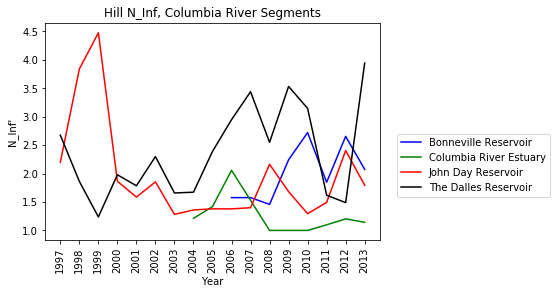

In [504]:
##  define color list
colors = ['b', 'g', 'r', 'k', 'c', 'm', 'y']
##  define index for iterating through color list
index = 0
##  for each river segment
for segment in segments:
    ##  subset df to non-zero values for the current river segment
    segDF = data.loc[data['RiverSeg'] == segment]
    segDF = segDF[segDF["lam'"]>0]

    ## sort based on year
    segDF = segDF.sort_values('Year')
    ## define x,y for plotting
    x = segDF["Year"]
    y = segDF["N_Inf"]
    ## change name of y to Riv Seg for legend
    y.name = segment
    ##  build graph...
    ##  plot segment x vs y
    plt.plot(x,y,colors[index])
    ##  locate legend
    plt.legend(loc=(1.05,0.2))
    ##  update title
    plt.title("Hill N_Inf, " + river + " River Segments")
    ##  label x axis
    plt.xlabel('Year')
    ##  label y axis
    plt.ylabel("N_Inf'")
    ##  force x axis to integer values, increment by 1 year
    plt.xticks(np.arange(min(x), max(x)+1, 1.0))
    ##  rotate year labels 90 degrees
    plt.xticks(rotation=90)
    ##  advance color index
    index += 1
##  save figure
plt.savefig(output + "\\" + river + "_Hill_N_Inf.png", bbox_inches='tight',dpi=300, size=(2000,2000))
##  display figure
plt.show()

In [505]:
## add new column
data["N10"] = ""

In [506]:
##  for each row calculate Hill N10
for i in range(len(data)):
    swi = 0.0
    for x in range(len(data.iloc[0]))[4:last]:
        if data.iloc[i][x] > 0:
            swi += -(data.iloc[i][x]/sum(data.iloc[i][4:last][data.iloc[i][4:last]>0])) * math.log((data.iloc[i][x]/sum(data.iloc[i][4:last][data.iloc[i][4:last]>0])))
    data.loc[i,'N10'] = math.exp(swi)/len(data.iloc[i][4:last][data.iloc[i][4:last]>0])

In [507]:
## display data frame with new index
data

,OBJECTID,River,RiverSeg,Year,BLGL,BLSK,CARP,CHIN,CHUM,CMCB,...,SWI_e,SWI_10,lam,1-lam,lam',1-lam',N1,N2,N_Inf,N10
0,1,Columbia,Bonneville Reservoir,2006,0,0,0,0,0,0,...,0.920111,0.399599,0.485459,0.514541,0.460122,0.539878,2.50957,2.05991,1.57685,0.35851
1,2,Columbia,Bonneville Reservoir,2007,0,0,0,0,0,0,...,0.914327,0.397087,0.477447,0.522553,0.430162,0.569838,2.4951,2.09447,1.57718,0.415849
2,3,Columbia,Bonneville Reservoir,2008,0,0,0,0,0,0,...,0.912233,0.396178,0.524633,0.475367,0.496141,0.503859,2.48988,1.90609,1.4577,0.355697
3,4,Columbia,Bonneville Reservoir,2009,0,0,0,0,0,0,...,1.14239,0.496134,0.364912,0.635088,0.329015,0.670985,3.13425,2.74039,2.24308,0.44775
4,5,Columbia,Bonneville Reservoir,2010,0,0,0,0,0,0,...,1.44347,0.62689,0.280278,0.719722,0.245096,0.754904,4.23535,3.56789,2.72101,0.605051
5,6,Columbia,Bonneville Reservoir,2011,0,0,0,0,0,0,...,1.05515,0.458246,0.40341,0.59659,0.340261,0.659739,2.87241,2.47887,1.84651,0.574481
6,7,Columbia,Bonneville Reservoir,2012,0,0,0,0,0,0,...,1.14919,0.499087,0.330356,0.669644,0.233232,0.766768,3.15563,3.02704,2.65487,0.525939
7,8,Columbia,Bonneville Reservoir,2013,0,0,0,0,0,0,...,1.11263,0.483207,0.373551,0.626449,0.29353,0.70647,3.04234,2.67701,2.07383,0.507056
8,9,Columbia,Columbia River Estuary,2004,0,0,0,0,0,0,...,0.645415,0.2803,0.693622,0.306378,0.687165,0.312835,1.90678,1.44171,1.21199,0.272397
9,10,Columbia,Columbia River Estuary,2005,0,0,0,0,0,0,...,0.866518,0.376324,0.540469,0.459531,0.51544,0.48456,2.37861,1.85024,1.41928,0.339802


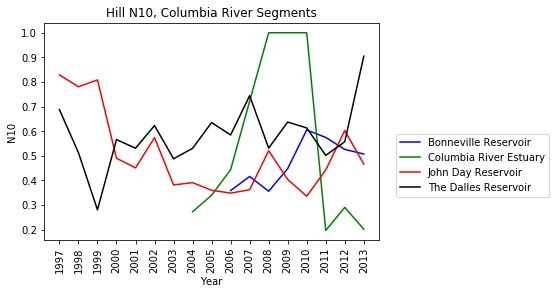

In [508]:
##  define color list
colors = ['b', 'g', 'r', 'k', 'c', 'm', 'y']
##  define index for iterating through color list
index = 0

##  for each river segment
for segment in segments:
    ##  subset df to non-zero values for the current river segment
    segDF = data.loc[data['RiverSeg'] == segment]
    segDF = segDF[segDF["lam'"]>0]

    ## sort based on year
    segDF = segDF.sort_values('Year')
    ## define x,y for plotting
    x = segDF["Year"]
    y = segDF["N10"]
    ## change name of y to Riv Seg for legend
    y.name = segment
    ##  build graph...
    plt.plot(x,y,colors[index])
    ##  locate legend
    plt.legend(loc=(1.05,0.2))
    ##  update title
    plt.title("Hill N10, " + river + " River Segments")
    ##  label x axis
    plt.xlabel('Year')
    ##  label y axis
    plt.ylabel("N10")
    ##  force x axis to integer values, increment by 1 year
    plt.xticks(np.arange(min(x), max(x)+1, 1.0))
    ##  rotate year labels 90 degrees
    plt.xticks(rotation=90)
    ##  advance color index
    index += 1
##  save figure
plt.savefig(output + "\\" + river + "_Hill_N10.png", bbox_inches='tight',dpi=300, size=(2000,2000))
##  display figure
plt.show()

In [509]:
## add new column
data["N10'"] = ""

In [510]:
##  for each row calculate Hill N10 prime 
for i in range(len(data)):
    swi = 0.0
    for x in range(len(data.iloc[0]))[4:last]:
        if data.iloc[i][x] > 0:
            swi += -(data.iloc[i][x]/sum(data.iloc[i][4:last][data.iloc[i][4:last]>0])) * math.log((data.iloc[i][x]/sum(data.iloc[i][4:last][data.iloc[i][4:last]>0])))
    try:
        data.loc[i,"N10'"] = (math.exp(swi)-1)/(len(data.iloc[i][4:last][data.iloc[i][4:last]>0])-1)
    except:
        data.loc[i,"N10'"] = 0

In [511]:
## display data frame with new index
data

,OBJECTID,River,RiverSeg,Year,BLGL,BLSK,CARP,CHIN,CHUM,CMCB,...,SWI_10,lam,1-lam,lam',1-lam',N1,N2,N_Inf,N10,N10'
0,1,Columbia,Bonneville Reservoir,2006,0,0,0,0,0,0,...,0.399599,0.485459,0.514541,0.460122,0.539878,2.50957,2.05991,1.57685,0.35851,0.251595
1,2,Columbia,Bonneville Reservoir,2007,0,0,0,0,0,0,...,0.397087,0.477447,0.522553,0.430162,0.569838,2.4951,2.09447,1.57718,0.415849,0.299019
2,3,Columbia,Bonneville Reservoir,2008,0,0,0,0,0,0,...,0.396178,0.524633,0.475367,0.496141,0.503859,2.48988,1.90609,1.4577,0.355697,0.248313
3,4,Columbia,Bonneville Reservoir,2009,0,0,0,0,0,0,...,0.496134,0.364912,0.635088,0.329015,0.670985,3.13425,2.74039,2.24308,0.44775,0.355708
4,5,Columbia,Bonneville Reservoir,2010,0,0,0,0,0,0,...,0.62689,0.280278,0.719722,0.245096,0.754904,4.23535,3.56789,2.72101,0.605051,0.539226
5,6,Columbia,Bonneville Reservoir,2011,0,0,0,0,0,0,...,0.458246,0.40341,0.59659,0.340261,0.659739,2.87241,2.47887,1.84651,0.574481,0.468101
6,7,Columbia,Bonneville Reservoir,2012,0,0,0,0,0,0,...,0.499087,0.330356,0.669644,0.233232,0.766768,3.15563,3.02704,2.65487,0.525939,0.431127
7,8,Columbia,Bonneville Reservoir,2013,0,0,0,0,0,0,...,0.483207,0.373551,0.626449,0.29353,0.70647,3.04234,2.67701,2.07383,0.507056,0.408468
8,9,Columbia,Columbia River Estuary,2004,0,0,0,0,0,0,...,0.2803,0.693622,0.306378,0.687165,0.312835,1.90678,1.44171,1.21199,0.272397,0.15113
9,10,Columbia,Columbia River Estuary,2005,0,0,0,0,0,0,...,0.376324,0.540469,0.459531,0.51544,0.48456,2.37861,1.85024,1.41928,0.339802,0.229769


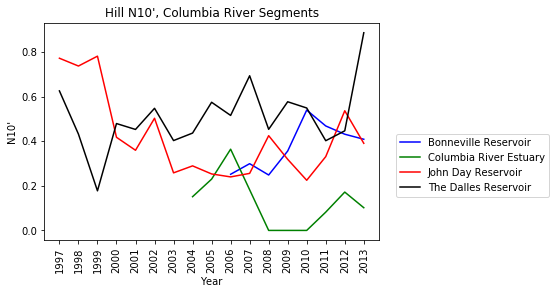

In [512]:
##  define color list
colors = ['b', 'g', 'r', 'k', 'c', 'm', 'y']
##  define index for iterating through color list
index = 0
##  for each river segment
for segment in segments:
    ##  subset df to non-zero values for the current river segment
    segDF = data.loc[data['RiverSeg'] == segment]
    segDF = segDF[segDF["lam'"]>0]

    ## sort based on year
    segDF = segDF.sort_values('Year')
    ## define x,y for plotting
    x = segDF["Year"]
    y = segDF["N10'"]
    ## change name of y to Riv Seg for legend
    y.name = segment
    ##  build graph...
    ##  plot segment x vs y
    plt.plot(x,y,colors[index])
    ##  locate legend
    plt.legend(loc=(1.05,0.2))
    ##  update title
    plt.title("Hill N10', " + river + " River Segments")
    ##  label x axis
    plt.xlabel('Year')
    ##  label y axis
    plt.ylabel("N10'")
    ##  force x axis to integer values, increment by 1 year
    plt.xticks(np.arange(min(x), max(x)+1, 1.0))
    ##  rotate year labels 90 degrees
    plt.xticks(rotation=90)
    ##  advance color index
    index += 1
##  save figure
plt.savefig(output + "\\" + river + "_Hill_N10'.png", bbox_inches='tight',dpi=300, size=(2000,2000))
##  display figure
plt.show()

In [513]:
## add new column
data["N21"] = ""

In [514]:
##  for each row calculate Hill N21
for i in range(len(data)):
    N = 0.0
    for x in range(len(data.iloc[0]))[4:last]:
        if data.iloc[i][x] > 0:
            N += data.iloc[i][x]
    #N2
    lam = 0.0
    for x in range(len(data.iloc[0]))[4:last]:
        lam += (data.iloc[i][x]/N) * (data.iloc[i][x]/N)
    N2 = 1/lam
        
    swi = 0.0
    for x in range(len(data.iloc[0]))[4:last]:
        if data.iloc[i][x] > 0:
            swi += -(data.iloc[i][x]/sum(data.iloc[i][4:last][data.iloc[i][4:last]>0])) * math.log((data.iloc[i][x]/sum(data.iloc[i][4:last][data.iloc[i][4:last]>0])))
    N1 = math.exp(swi)
    
    data.loc[i,"N21"] = N2/N1

In [515]:
## display data frame with new index
data

,OBJECTID,River,RiverSeg,Year,BLGL,BLSK,CARP,CHIN,CHUM,CMCB,...,lam,1-lam,lam',1-lam',N1,N2,N_Inf,N10,N10',N21
0,1,Columbia,Bonneville Reservoir,2006,0,0,0,0,0,0,...,0.485459,0.514541,0.460122,0.539878,2.50957,2.05991,1.57685,0.35851,0.251595,0.820821
1,2,Columbia,Bonneville Reservoir,2007,0,0,0,0,0,0,...,0.477447,0.522553,0.430162,0.569838,2.4951,2.09447,1.57718,0.415849,0.299019,0.839437
2,3,Columbia,Bonneville Reservoir,2008,0,0,0,0,0,0,...,0.524633,0.475367,0.496141,0.503859,2.48988,1.90609,1.4577,0.355697,0.248313,0.765537
3,4,Columbia,Bonneville Reservoir,2009,0,0,0,0,0,0,...,0.364912,0.635088,0.329015,0.670985,3.13425,2.74039,2.24308,0.44775,0.355708,0.874336
4,5,Columbia,Bonneville Reservoir,2010,0,0,0,0,0,0,...,0.280278,0.719722,0.245096,0.754904,4.23535,3.56789,2.72101,0.605051,0.539226,0.842406
5,6,Columbia,Bonneville Reservoir,2011,0,0,0,0,0,0,...,0.40341,0.59659,0.340261,0.659739,2.87241,2.47887,1.84651,0.574481,0.468101,0.862994
6,7,Columbia,Bonneville Reservoir,2012,0,0,0,0,0,0,...,0.330356,0.669644,0.233232,0.766768,3.15563,3.02704,2.65487,0.525939,0.431127,0.95925
7,8,Columbia,Bonneville Reservoir,2013,0,0,0,0,0,0,...,0.373551,0.626449,0.29353,0.70647,3.04234,2.67701,2.07383,0.507056,0.408468,0.87992
8,9,Columbia,Columbia River Estuary,2004,0,0,0,0,0,0,...,0.693622,0.306378,0.687165,0.312835,1.90678,1.44171,1.21199,0.272397,0.15113,0.756095
9,10,Columbia,Columbia River Estuary,2005,0,0,0,0,0,0,...,0.540469,0.459531,0.51544,0.48456,2.37861,1.85024,1.41928,0.339802,0.229769,0.777866


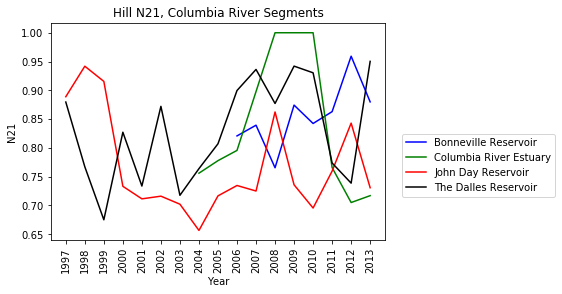

In [516]:
##  define color list
colors = ['b', 'g', 'r', 'k', 'c', 'm', 'y']
##  define index for iterating through color list
index = 0
##  for each river segment
for segment in segments:
    ##  subset df to non-zero values for the current river segment
    segDF = data.loc[data['RiverSeg'] == segment]
    segDF = segDF[segDF["lam'"]>0]

    ## sort based on year
    segDF = segDF.sort_values('Year')
    ## define x,y for plotting
    x = segDF["Year"]
    y = segDF["N21"]
    ## change name of y to Riv Seg for legend
    y.name = segment
    ##  build graph...
    ##  plot segment x vs y
    plt.plot(x,y,colors[index])
    ##  locate legend
    plt.legend(loc=(1.05,0.2))
    ##  update title
    plt.title("Hill N21, " + river + " River Segments")
    ##  label x axis
    plt.xlabel('Year')
    ##  label y axis
    plt.ylabel("N21")
    ##  force x axis to integer values, increment by 1 year
    plt.xticks(np.arange(min(x), max(x)+1, 1.0))
    ##  rotate year labels 90 degrees
    plt.xticks(rotation=90)
    ##  advance color index
    index += 1
##  save figure
plt.savefig(output + "\\" + river + "_Hill_N21.png", bbox_inches='tight',dpi=300, size=(2000,2000))
##  display figure
plt.show()

In [517]:
## add new column
data["N21'"] = ""

In [518]:
##  for each row calculate Hill N21 Prime
for i in range(len(data)):

    N = 0.0
    for x in range(len(data.iloc[0]))[4:last]:
        if data.iloc[i][x] > 0:
            N += data.iloc[i][x]
    #N2
    lam = 0.0
    for x in range(len(data.iloc[0]))[4:last]:
        lam += (data.iloc[i][x]/N) * (data.iloc[i][x]/N)
    N2 = 1/lam

    swi = 0.0
    for x in range(len(data.iloc[0]))[4:last]:
        if data.iloc[i][x] > 0:
            swi += -(data.iloc[i][x]/sum(data.iloc[i][4:last][data.iloc[i][4:last]>0])) * math.log((data.iloc[i][x]/sum(data.iloc[i][4:last][data.iloc[i][4:last]>0])))
    N1 = math.exp(swi)


    data.loc[i,"N21'"] = (N2-1)/(N1-1)

    


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:21: RuntimeWarning: invalid value encountered in double_scalars


In [519]:
## display data frame with new index
data

,OBJECTID,River,RiverSeg,Year,BLGL,BLSK,CARP,CHIN,CHUM,CMCB,...,1-lam,lam',1-lam',N1,N2,N_Inf,N10,N10',N21,N21'
0,1,Columbia,Bonneville Reservoir,2006,0,0,0,0,0,0,...,0.514541,0.460122,0.539878,2.50957,2.05991,1.57685,0.35851,0.251595,0.820821,0.702126
1,2,Columbia,Bonneville Reservoir,2007,0,0,0,0,0,0,...,0.522553,0.430162,0.569838,2.4951,2.09447,1.57718,0.415849,0.299019,0.839437,0.732043
2,3,Columbia,Bonneville Reservoir,2008,0,0,0,0,0,0,...,0.475367,0.496141,0.503859,2.48988,1.90609,1.4577,0.355697,0.248313,0.765537,0.608166
3,4,Columbia,Bonneville Reservoir,2009,0,0,0,0,0,0,...,0.635088,0.329015,0.670985,3.13425,2.74039,2.24308,0.44775,0.355708,0.874336,0.815457
4,5,Columbia,Bonneville Reservoir,2010,0,0,0,0,0,0,...,0.719722,0.245096,0.754904,4.23535,3.56789,2.72101,0.605051,0.539226,0.842406,0.793696
5,6,Columbia,Bonneville Reservoir,2011,0,0,0,0,0,0,...,0.59659,0.340261,0.659739,2.87241,2.47887,1.84651,0.574481,0.468101,0.862994,0.789823
6,7,Columbia,Bonneville Reservoir,2012,0,0,0,0,0,0,...,0.669644,0.233232,0.766768,3.15563,3.02704,2.65487,0.525939,0.431127,0.95925,0.940346
7,8,Columbia,Bonneville Reservoir,2013,0,0,0,0,0,0,...,0.626449,0.29353,0.70647,3.04234,2.67701,2.07383,0.507056,0.408468,0.87992,0.821124
8,9,Columbia,Columbia River Estuary,2004,0,0,0,0,0,0,...,0.306378,0.687165,0.312835,1.90678,1.44171,1.21199,0.272397,0.15113,0.756095,0.487116
9,10,Columbia,Columbia River Estuary,2005,0,0,0,0,0,0,...,0.459531,0.51544,0.48456,2.37861,1.85024,1.41928,0.339802,0.229769,0.777866,0.616738


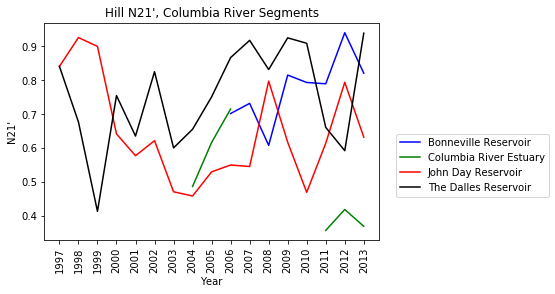

In [520]:
##  define color list
colors = ['b', 'g', 'r', 'k', 'c', 'm', 'y']
##  define index for iterating through color list
index = 0
##  for each river segment
for segment in segments:
    ##  subset df to non-zero values for the current river segment
    segDF = data.loc[data['RiverSeg'] == segment]
    segDF = segDF[segDF["lam'"]>0]

    ## sort based on year
    segDF = segDF.sort_values('Year')
    ## define x,y for plotting
    x = segDF["Year"]
    y = segDF["N21'"]
    ## change name of y to Riv Seg for legend
    y.name = segment
    ##  build graph...
    ##  plot segment x vs y
    plt.plot(x,y,colors[index])
    ##  locate legend
    plt.legend(loc=(1.05,0.2))
    ##  update title
    plt.title("Hill N21', " + river + " River Segments")
    ##  label x axis
    plt.xlabel('Year')
    ##  label y axis
    plt.ylabel("N21'")
    ##  force x axis to integer values, increment by 1 year
    plt.xticks(np.arange(min(x), max(x)+1, 1.0))
    ##  rotate year labels 90 degrees
    plt.xticks(rotation=90)
    ##  advance color index
    index += 1
##  save figure
plt.savefig(output + "\\" + river + "_Hill_N21'.png", bbox_inches='tight',dpi=300, size=(2000,2000))
##  display figure
plt.show()

In [521]:
## add new column
data["Pielou"] = ""

In [522]:
##  for each row calculate Pielou's Evenness Index 
for i in range(len(data)):

    count = 0.0
    hmax = 0.0
    
    for x in range(len(data.iloc[0]))[4:last]:
        if data.iloc[i][x] > 0:
            count += 1

    swi = 0.0
    for x in range(len(data.iloc[0]))[4:last]:
        if data.iloc[i][x] > 0:
            swi += -(data.iloc[i][x]/sum(data.iloc[i][4:last][data.iloc[i][4:last]>0])) * math.log((data.iloc[i][x]/sum(data.iloc[i][4:last][data.iloc[i][4:last]>0])))

          
    data.loc[i,'Pielou'] = swi/math.log(count)







C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:17: RuntimeWarning: invalid value encountered in double_scalars


In [523]:
## display data frame with new index
data

,OBJECTID,River,RiverSeg,Year,BLGL,BLSK,CARP,CHIN,CHUM,CMCB,...,lam',1-lam',N1,N2,N_Inf,N10,N10',N21,N21',Pielou
0,1,Columbia,Bonneville Reservoir,2006,0,0,0,0,0,0,...,0.460122,0.539878,2.50957,2.05991,1.57685,0.35851,0.251595,0.820821,0.702126,0.472843
1,2,Columbia,Bonneville Reservoir,2007,0,0,0,0,0,0,...,0.430162,0.569838,2.4951,2.09447,1.57718,0.415849,0.299019,0.839437,0.732043,0.510296
2,3,Columbia,Bonneville Reservoir,2008,0,0,0,0,0,0,...,0.496141,0.503859,2.48988,1.90609,1.4577,0.355697,0.248313,0.765537,0.608166,0.468795
3,4,Columbia,Bonneville Reservoir,2009,0,0,0,0,0,0,...,0.329015,0.670985,3.13425,2.74039,2.24308,0.44775,0.355708,0.874336,0.815457,0.587072
4,5,Columbia,Bonneville Reservoir,2010,0,0,0,0,0,0,...,0.245096,0.754904,4.23535,3.56789,2.72101,0.605051,0.539226,0.842406,0.793696,0.741795
5,6,Columbia,Bonneville Reservoir,2011,0,0,0,0,0,0,...,0.340261,0.659739,2.87241,2.47887,1.84651,0.574481,0.468101,0.862994,0.789823,0.655602
6,7,Columbia,Bonneville Reservoir,2012,0,0,0,0,0,0,...,0.233232,0.766768,3.15563,3.02704,2.65487,0.525939,0.431127,0.95925,0.940346,0.641375
7,8,Columbia,Bonneville Reservoir,2013,0,0,0,0,0,0,...,0.29353,0.70647,3.04234,2.67701,2.07383,0.507056,0.408468,0.87992,0.821124,0.620969
8,9,Columbia,Columbia River Estuary,2004,0,0,0,0,0,0,...,0.687165,0.312835,1.90678,1.44171,1.21199,0.272397,0.15113,0.756095,0.487116,0.331678
9,10,Columbia,Columbia River Estuary,2005,0,0,0,0,0,0,...,0.51544,0.48456,2.37861,1.85024,1.41928,0.339802,0.229769,0.777866,0.616738,0.445302


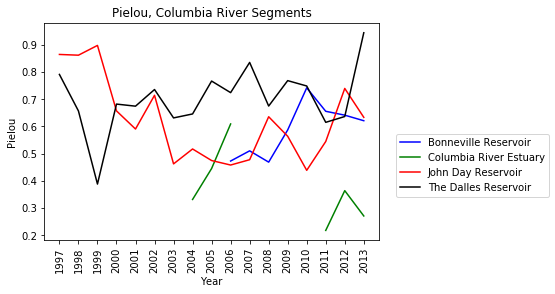

In [524]:
##  define color list
colors = ['b', 'g', 'r', 'k', 'c', 'm', 'y']
##  define index for iterating through color list
index = 0
##  for each river segment
for segment in segments:
    ##  subset df to non-zero values for the current river segment
    segDF = data.loc[data['RiverSeg'] == segment]
    segDF = segDF[segDF["lam'"]>0]

    ## sort based on year
    segDF = segDF.sort_values('Year')
    ## define x,y for plotting
    x = segDF["Year"]
    y = segDF["Pielou"]
    ## change name of y to Riv Seg for legend
    y.name = segment
    ##  build graph...
    ##  plot segment x vs y
    plt.plot(x,y,colors[index])
    ##  locate legend
    plt.legend(loc=(1.05,0.2))
    ##  update title
    plt.title("Pielou, " + river + " River Segments")
    ##  label x axis
    plt.xlabel('Year')
    ##  label y axis
    plt.ylabel("Pielou")
    ##  force x axis to integer values, increment by 1 year
    plt.xticks(np.arange(min(x), max(x)+1, 1.0))
    ##  rotate year labels 90 degrees
    plt.xticks(rotation=90)
    ##  advance color index
    index += 1
##  save figure
plt.savefig(output + "\\" + river + "_Pielou.png", bbox_inches='tight',dpi=300, size=(2000,2000))
##  display figure
plt.show()

In [525]:
##  save dataframe with biodiversity indices to csv
data.to_csv(output + "\\" + river + "_biodiv.csv")